# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [16]:
file_id = "1F-xCO_hgCUW1fGKnEiZu-iPAWgLKMP2f"
direct_link = f"https://drive.google.com/uc?export=download&id={file_id}"
df_cls = pd.read_csv(direct_link)
df_cls.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,TUE,CALC,BMI,Weight_FAF_Ratio,Obesity_Risk_Score,Lifestyle_Score,Diet_Score,Cluster,Risk_Category,MTRANS
0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.0,Frequently,no,...,1.000000,no,23.422091,28.500000,12.211045,0.600000,0.100000,2,Low - Active,Automobile
1,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.0,Sometimes,no,...,0.780199,Sometimes,44.855798,53.193735,23.027899,0.877997,0.497782,0,Medium - Semi Active,Public_Transportation
2,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.0,Sometimes,no,...,1.000000,Sometimes,16.861932,17.594544,9.030966,1.199523,0.358735,2,Low - Active,Public_Transportation
3,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.0,Sometimes,no,...,0.696948,Sometimes,36.610787,112.725005,18.905394,0.339390,0.400000,1,High - Passive,Automobile
4,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.0,Sometimes,no,...,0.000000,Sometimes,38.591446,73.941260,19.895723,0.439462,0.400000,0,Medium - Semi Active,Automobile


In [17]:
df_cls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12289 entries, 0 to 12288
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          12289 non-null  object 
 1   Age                             12289 non-null  float64
 2   Height                          12289 non-null  float64
 3   Weight                          12289 non-null  float64
 4   family_history_with_overweight  12289 non-null  object 
 5   FAVC                            12289 non-null  object 
 6   FCVC                            12289 non-null  float64
 7   NCP                             12289 non-null  float64
 8   CAEC                            12289 non-null  object 
 9   SMOKE                           12289 non-null  object 
 10  CH2O                            12289 non-null  float64
 11  SCC                             12289 non-null  object 
 12  FAF                             

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [18]:
df_cls = df_cls.drop('Cluster', axis=1)

In [19]:
label_encoder = {}
for col in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']:
    le = LabelEncoder()
    df_cls[col] = le.fit_transform(df_cls[col])
    label_encoder[col] = le

In [20]:
target_encoder = LabelEncoder()
df_cls['Risk_Category'] = target_encoder.fit_transform(df_cls['Risk_Category'])

In [21]:
df_cls.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,FAF,TUE,CALC,BMI,Weight_FAF_Ratio,Obesity_Risk_Score,Lifestyle_Score,Diet_Score,Risk_Category,MTRANS
0,0,18.000000,1.560000,57.000000,1,1,2.000000,3.0,1,0,...,1.000000,1.000000,2,23.422091,28.500000,12.211045,0.600000,0.100000,1,0
1,0,20.952737,1.710730,131.274851,1,1,3.000000,3.0,2,0,...,1.467863,0.780199,1,44.855798,53.193735,23.027899,0.877997,0.497782,2,3
2,1,18.128249,1.748524,51.552595,1,1,2.919751,3.0,2,0,...,1.930033,1.000000,1,16.861932,17.594544,9.030966,1.199523,0.358735,1,3
3,1,29.883021,1.754711,112.725005,1,1,1.991240,3.0,2,0,...,0.000000,0.696948,1,36.610787,112.725005,18.905394,0.339390,0.400000,0,0
4,1,29.891473,1.750150,118.206565,1,1,1.397468,3.0,2,0,...,0.598655,0.000000,1,38.591446,73.941260,19.895723,0.439462,0.400000,2,0


In [22]:
X = df_cls.drop('Risk_Category', axis=1)
y = df_cls['Risk_Category']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(9831, 21), y_train=(9831,)
Test set shape: X_test=(2458, 21), y_test=(2458,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [26]:
# Random forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Dalam tahap klsifikasi ini digunakan:
- Algoritma Random Forest -> sering memberikan akurasi yang sangat baik, dpt mengurangi overfitting dengan menggabungkan banyak pohon keputusan, mampu menngani data yang kelasnya tidak seimbang, serta dpat mengisi nilai yang hilang dengan median.
- Algoritma KNN (K-Nearest Neightbors) -> algoritmanya simpel dapat diimplementasikan tanpa banyak asumsi dan cocok dengan berbagai jenis data.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [27]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} F1-Score: {f1:.4f}")
    print(f"{model_name} Precision: {precision:.4f}")
    print(f"{model_name} Recall: {recall:.4f}\n")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

Random Forest Accuracy: 0.9992
Random Forest F1-Score: 0.9992
Random Forest Precision: 0.9992
Random Forest Recall: 0.9992

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       660
           1       1.00      1.00      1.00       883
           2       1.00      1.00      1.00       915

    accuracy                           1.00      2458
   macro avg       1.00      1.00      1.00      2458
weighted avg       1.00      1.00      1.00      2458



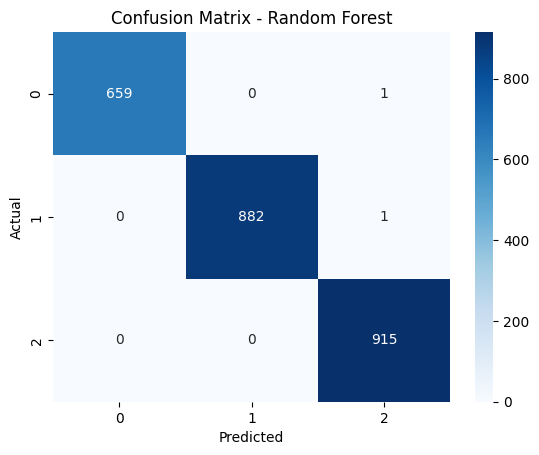

In [28]:
evaluate_model(rf_model, X_test, y_test, 'Random Forest')

K-Nearest Neighbors Accuracy: 0.9312
K-Nearest Neighbors F1-Score: 0.9311
K-Nearest Neighbors Precision: 0.9320
K-Nearest Neighbors Recall: 0.9312

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       660
           1       0.90      0.95      0.92       883
           2       0.93      0.88      0.91       915

    accuracy                           0.93      2458
   macro avg       0.94      0.94      0.94      2458
weighted avg       0.93      0.93      0.93      2458



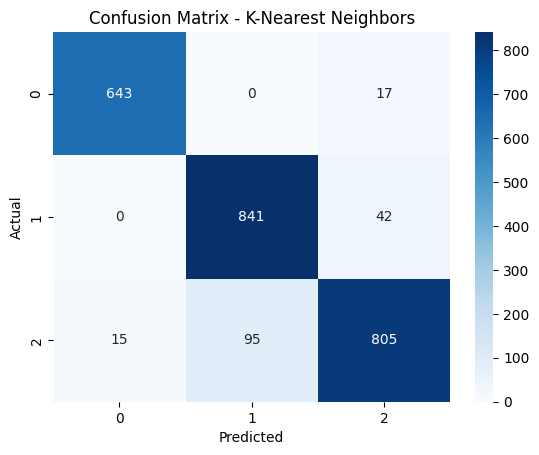

In [29]:
evaluate_model(knn_model, X_test, y_test, 'K-Nearest Neighbors')

Hasil evaluasi model
- Random forest mendapat nilai akurasi, F1-Score, Precision, dn Recall sebesar 99.92% dengan 2458 data uji. Terdapat 2 kesalahan prediksi untuk kategori 0 dan 1. Hasil Prediksi hampir sempurna tidak ada bias terhadap kelas tertentu.
- KNN mendapat nilai akurasi, Precision, dan Recall yang sama sebesar 93.12%, sedangkan F1-Score 93.11% dengan 2458 data uji. terdapat banyak kesalahan prediksi dibandingkan dengan Random Forest. Kategori 2 terdpat kesalahan tertinggi dalam klasifiksi sebesar 110 sampel. Pada kategori 1 terdapat kesalahn klasifiksi sebayak 42 sampel yang diprediksi menjadi kategori 2. Lalu pada kategori 0 terdapat kesalahan sebanyak 17 sampel yang diprediksi menjadi kategori 2.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [30]:
# Random Forest
param_gird_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_gird_rf, cv=3, n_jobs=-1, verbose=2)
print("Fitting Random Forest...")
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print(f"Best Random Forest Parameters: {grid_search_rf.best_params_}")
print(f"Random Forest Accuracy after Grid Search: {best_rf.score(X_test, y_test):.4f}")

Fitting Random Forest...
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Accuracy after Grid Search: 0.9992


In [31]:
# K-Nearest Neighbors
param_grid_knn = {
    'n_neighbors' : [3, 5, 7, 9],
    'weights' : ['uniform', 'distance'],
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=3, n_jobs=-1, verbose=2)
print("Fitting KNN...")
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
print(f"Best KNN Parameters: {grid_search_knn.best_params_}")
print(f"KNN Accuracy after Grid Search: {best_knn.score(X_test, y_test):.4f}")

Fitting KNN...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best KNN Parameters: {'n_neighbors': 5, 'weights': 'distance'}
KNN Accuracy after Grid Search: 0.9361


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [36]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(f"{model_name} F1-Score: {f1:.4f}")
    print(f"{model_name} Precision: {precision:.4f}")
    print(f"{model_name} Recall: {recall:.4f}\n")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix {model_name}")
    plt.show()

Random Forest (Tuned) Accuracy: 0.9992
Random Forest (Tuned) F1-Score: 0.9992
Random Forest (Tuned) Precision: 0.9992
Random Forest (Tuned) Recall: 0.9992

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       660
           1       1.00      1.00      1.00       883
           2       1.00      1.00      1.00       915

    accuracy                           1.00      2458
   macro avg       1.00      1.00      1.00      2458
weighted avg       1.00      1.00      1.00      2458



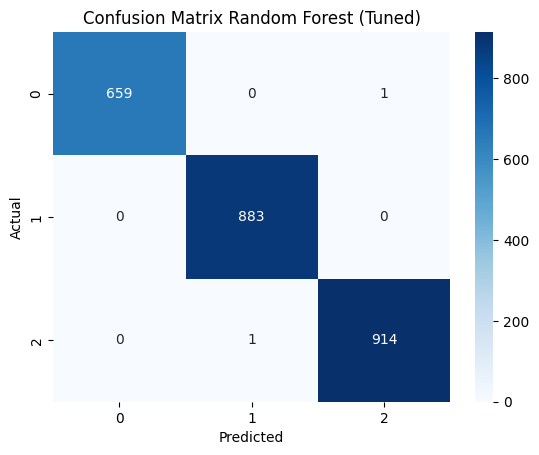

In [37]:
evaluate_model(best_rf, X_test, y_test, 'Random Forest (Tuned)')

KNN (Tuned) Accuracy: 0.9361
KNN (Tuned) F1-Score: 0.9360
KNN (Tuned) Precision: 0.9367
KNN (Tuned) Recall: 0.9361

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       660
           1       0.91      0.96      0.93       883
           2       0.93      0.89      0.91       915

    accuracy                           0.94      2458
   macro avg       0.94      0.94      0.94      2458
weighted avg       0.94      0.94      0.94      2458



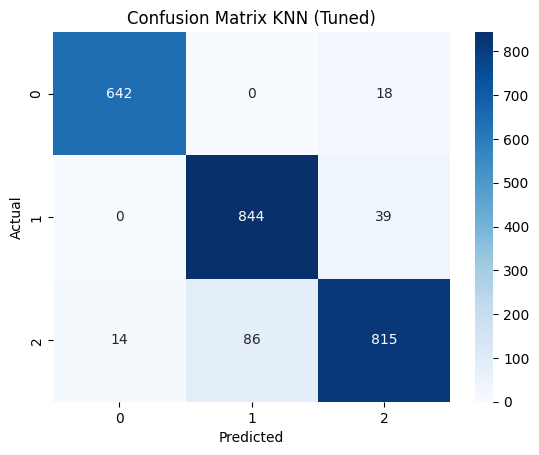

In [38]:
evaluate_model(best_knn, X_test, y_test, 'KNN (Tuned)')

In [43]:
# Cek Overfitting/Underfitting dengan Threshold 0.05 - 0.1
def check_overfit_underfit(model, X_train, y_train, X_test, y_test):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"Training Score: {train_score:.4f}")
    print(f"Testing Score: {test_score:.4f}")
    if train_score > test_score + 0.05:
        print("Model mengalami Overfitting")
    elif test_score > train_score + 0.1:
        print("Model mengalami Underfitting")
    else:
        print("Model dalam kondisi Good Fit")

print("\nRandom Forest:")
check_overfit_underfit(best_rf, X_train, y_train, X_test, y_test)

print("\nKNN:")
check_overfit_underfit(best_knn, X_train, y_train, X_test, y_test)



Random Forest:
Training Score: 1.0000
Testing Score: 0.9992
Model dalam kondisi Good Fit

KNN:
Training Score: 1.0000
Testing Score: 0.9361
Model mengalami Overfitting


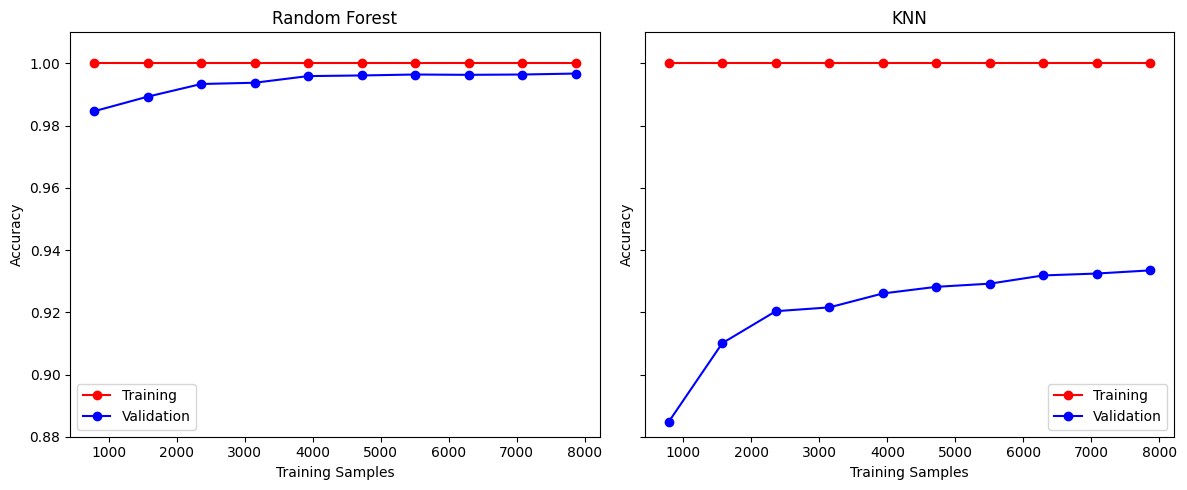

In [46]:
def plot_learning_curve(model, X, y, title, ax, ylim=(0.88, 1.01)):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_mean, 'o-', color='red', label='Training')
    ax.plot(train_sizes, test_mean, 'o-', color='blue', label='Validation')

    ax.set_title(title)
    ax.set_xlabel("Training Samples")
    ax.set_ylabel("Accuracy")
    ax.legend()
    ax.set_ylim(ylim)


fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

plot_learning_curve(best_rf, X_train, y_train, "Random Forest", axes[0])
plot_learning_curve(best_knn, X_train, y_train, "KNN", axes[1])

plt.tight_layout()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Jawab:
1. Hasil Accuracy, F1-Score, Precision, Recall pada Random Forest tetap sama dengan sebelum dilakukan tuning, yaitu sebesar 99.92%. Sedangkan pada KNN mengalami peningkatan yang tidak terlalu signifikan setelah dilkukan tuning. Hal ini menunjukkan bahwa parameter awal sudah cukup optimal.
2. Pada Random Forest nilai Precision dan Recall 1.00 pada semua kelas yang menandakan tidak ada ketimpangan prediksi ntar kelas. Sedangkan pada KNN nilai Precision lebih rendah pada kategori tertentu (kategori 1 dan 2), nilai Recall juga rendah pada kategori 2 yang artinya model sering gagal mengklasifiksikan kategori dengan benar. Dari kedua model didapat bahwa Random Forest menjadi model terbaik untuk dataset ini karena memiliki akurasi yang tinggi dan tidak ada overfitting ataupun underfitting. Sedangkan KNN msih terdapat overfitting walaupun kurasinya lumayan bagus.
3. Rekomendasi tindak lanjut:
  - KNN bisa ditingkatkan dengan berbagai nilai k
  - Coba evaluasi model dengan dataset baru untuk melihat performa model
  - Bisa dilakukan eksplorasi lebih lanjut menggunakan algoritma lain seperti XGBoost, SVM, ataupun LightGBM